# Filtragem Digital 3

Esta atividade consiste em projetar diferentes filtros passa-baixa e filtrar o sinal

*Processamento Digital de Sinais - UFPR - Prof. Eduardo Parente Ribeiro*

In [18]:
from pylab import *
from scipy import signal

1) Considere o sinal x, a soma de 2 senoides.

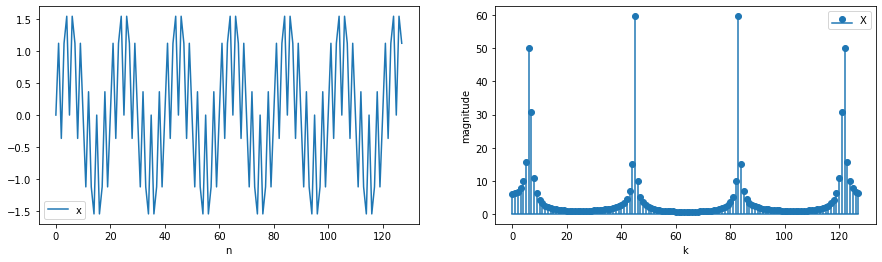

In [19]:
N=128
n=arange(N)
x1=sin(0.1*pi*n)
x2=sin(0.7*pi*n)
x=x1 + x2

figure(figsize=(15,4))
subplot(1,2,1)
plot(x,label='x')
legend()
xlabel('n')
subplot(1,2,2)
stem(abs(fft(x)),basefmt='C0', label='X')
legend()
ylabel('magnitude')
xlabel('k')
show()

2) Projete quatro filtros passa-baixa de ordem 8 e freq. de corte=0.5. (butter, cheby1, cheby2, ellip).<br>
Plotar no mesmo eixo as respostas em frequência, de 0 a pi. Plotar tambem em escala logaritmica a amplitude, com semilogy().

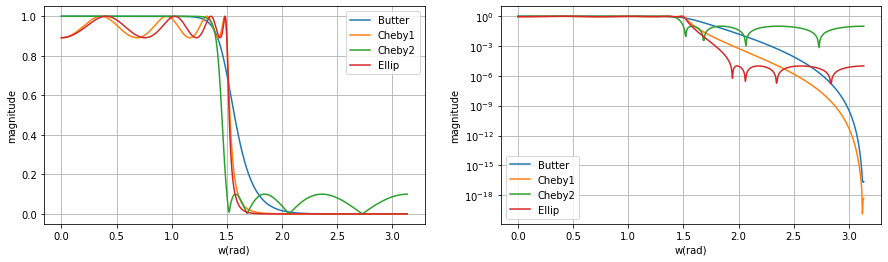

In [20]:
##Tentei criar as variaveis como arrays para usar loops e diminuir as linhas de código
##mas não funcionou bem

ordem = 8

filtros = [signal.butter, signal.cheby1, signal.cheby2, signal.ellip]
bFiltro = zeros((4,ordem+1))
aFiltro = zeros((4,ordem+1))
#wFiltro = zeros((4,512))
#hFiltro = zeros((4,512))

bFiltro[0], aFiltro[0] = filtros[0](8, 1.5, btype='lowpass', fs=2*pi)
filtroButter = signal.lfilter(bFiltro[0], aFiltro[0], x)
wBt, hBt = signal.freqz(bFiltro[0], aFiltro[0])
#wFiltro[0,:], hFiltro[0,:] = signal.freqz(bFiltro[0], aFiltro[0])

bFiltro[1], aFiltro[1] = filtros[1](8, 1, 1.5, btype='lowpass', fs=2*pi)
filtroCheby1 = signal.lfilter(bFiltro[1], aFiltro[1], x)
wCh1, hCh1 = signal.freqz(bFiltro[1], aFiltro[1])

bFiltro[2], aFiltro[2] = filtros[2](8, 20, 1.5, btype='lowpass', fs=2*pi)
filtroCheby2 = signal.lfilter(bFiltro[2], aFiltro[2], x)
wCh2, hCh2 = signal.freqz(bFiltro[2], aFiltro[2])

bFiltro[3], aFiltro[3] = filtros[3](8, 1, 100, 1.5, btype='lowpass', fs=2*pi)
filtroEllip = signal.lfilter(bFiltro[3], aFiltro[3], x)
wEl, hEl = signal.freqz(bFiltro[3], aFiltro[3])

figure(figsize=(15,4))

subplot(1, 2, 1)
plot(wBt, abs(hBt), label='Butter')
#plot(wFiltro[0,:], abs(hFiltro[0,:]), label='Butter')
plot(wCh1, abs(hCh1), label='Cheby1')
plot(wCh2, abs(hCh2), label='Cheby2')
plot(wEl, abs(hEl), label='Ellip')
xlabel('w(rad)')
ylabel('magnitude')
legend()
grid()

subplot(1, 2, 2)
semilogy(wBt, abs(hBt), label='Butter')
semilogy(wCh1, abs(hCh1), label='Cheby1')
semilogy(wCh2, abs(hCh2), label='Cheby2')
semilogy(wEl, abs(hEl), label='Ellip')
xlabel('w(rad)')
ylabel('magnitude')
legend()
grid()

2) Visualizar na mesma tela (com subplots) os diagramas de pólos e zeros.


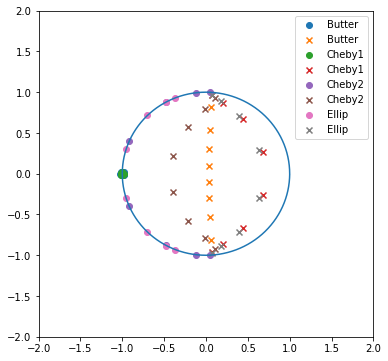

In [21]:
zBt, pBt, kBt = signal.tf2zpk(bFiltro[0], aFiltro[0])
zCh1, pCh1, kCh1 = signal.tf2zpk(bFiltro[1], aFiltro[1])
zCh2, pCh2, kCh2 = signal.tf2zpk(bFiltro[2], aFiltro[2])
zEl, pEl, kEl = signal.tf2zpk(bFiltro[3], aFiltro[3])

figure(figsize=(6,6))
xlim([-2,2])
ylim([-2,2])


realZBt = real(zBt)
imagZBt = imag(zBt)
realPBt = real(pBt)
imagPBt = imag(pBt)
scatter(realZBt, imagZBt, label='Butter', marker='o')
scatter(realPBt, imagPBt, label='Butter', marker='x')

realZCh1 = real(zCh1)
imagZCh1 = imag(zCh1)
realPCh1 = real(pCh1)
imagPCh1 = imag(pCh1)
scatter(realZCh1, imagZCh1, label='Cheby1', marker='o')
scatter(realPCh1, imagPCh1, label='Cheby1', marker='x')

realZCh2 = real(zCh2)
imagZCh2 = imag(zCh2)
realPCh2 = real(pCh2)
imagPCh2 = imag(pCh2)
scatter(realZCh2, imagZCh2, label='Cheby2', marker='o')
scatter(realPCh2, imagPCh2, label='Cheby2', marker='x')

realZEl = real(zEl)
imagZEl = imag(zEl)
realPEl = real(pEl)
imagPEl = imag(pEl)
scatter(realZEl, imagZEl, label='Ellip', marker='o')
scatter(realPEl, imagPEl, label='Ellip', marker='x')


graus = arange(0, 2*pi, 2*pi/360)
circuloUnit = [cos(g) + 1j*sin(g) for g in graus]
realCUnit = real(circuloUnit)
imagCUnit = imag(circuloUnit)
plot(realCUnit, imagCUnit)
legend()

4) Obter os sinais filtrados por cada filtro. 

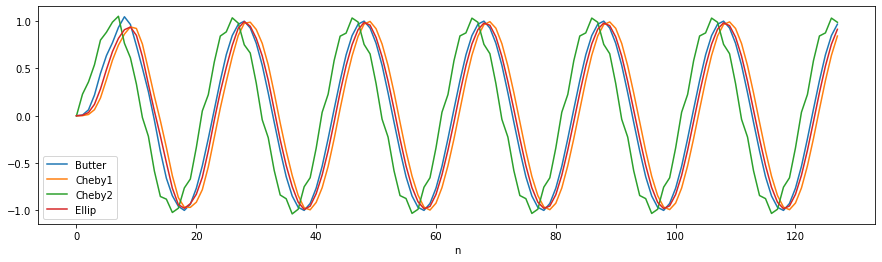

In [22]:
figure(figsize=(15,4))

plot(filtroButter, label='Butter')
plot(filtroCheby1, label='Cheby1')
plot(filtroCheby2, label='Cheby2')
plot(filtroEllip, label='Ellip')
xlabel('n')
legend()

5) Plotar o espectro do sinal filtrado por cada filtro ne mesmo eixo. Repetir, numa escala logaritmica (semilogy())).

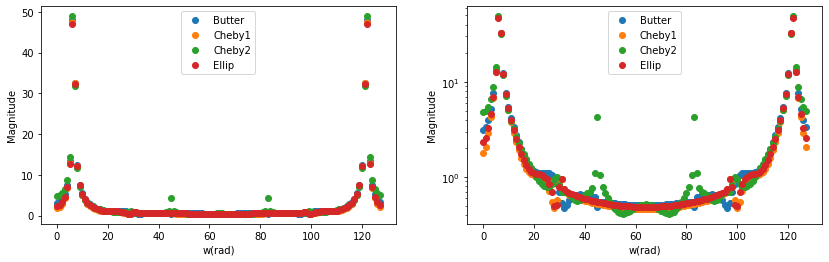

In [23]:
figure(figsize=(14,4))

FButter = fft(filtroButter)
FCheby1 = fft(filtroCheby1)
FCheby2 = fft(filtroCheby2)
FEllip = fft(filtroEllip)

subplot(1, 2, 1)
plot(abs(FButter), 'o', label='Butter')
plot(abs(FCheby1), 'o', label='Cheby1')
plot(abs(FCheby2), 'o', label='Cheby2')
plot(abs(FEllip), 'o', label='Ellip')
xlabel('w(rad)')
ylabel('Magnitude')
legend()

subplot(1, 2, 2)
semilogy(abs(FButter), 'o', label='Butter')
semilogy(abs(FCheby1), 'o', label='Cheby1')
semilogy(abs(FCheby2), 'o', label='Cheby2')
semilogy(abs(FEllip), 'o', label='Ellip')
xlabel('w(rad)')
ylabel('Magnitude')
legend()